In [17]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm  # Import the normal distribution

In [5]:
df = pd.read_csv("data/GOES/goes.csv")

In [8]:
def class_to_log_intensity(intensity):
    cls = intensity[0]
    magnitude = float(intensity[1:].replace(",", ".")) if intensity[1:] else 1
    intesities = {
        "A": 10**-8,
        "B": 10**-7,
        "C": 10**-6,
        "M": 10**-5,
        "X": 10**-4,
    }
    if intesities[cls] * magnitude == 0:
        return 0
    return math.log10(intesities[cls]) + math.log(magnitude)

In [9]:
df["log_intensity"] = df["fl_goescls"].apply(lambda x: class_to_log_intensity(x))

In [11]:
df['log_intensity'].head()

0   -6.208241
1   -6.054090
2   -6.054090
3   -6.054090
4   -6.904690
Name: log_intensity, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


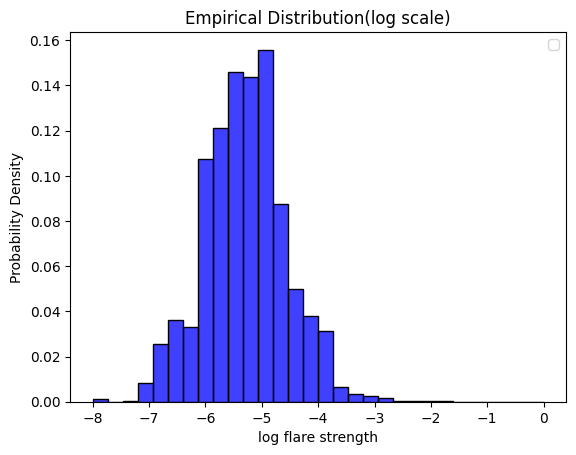

In [28]:
# Data values
data = df["log_intensity"].tolist()
# Create a Seaborn histogram with probability density
sns.histplot(data, kde=False, color="blue", bins=30, stat="probability")
plt.xlabel("log flare strength")
plt.ylabel("Probability Density")
plt.title("Empirical Distribution(log scale)")
plt.legend()
plt.show()

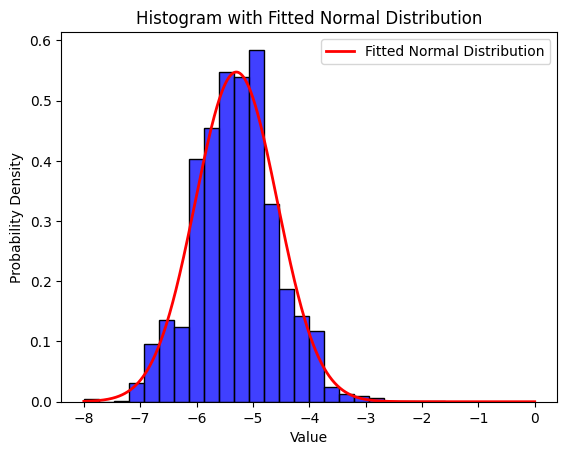

Fitted Parameters - Mean (mu): -5.294256080410237, Standard Deviation (std): 0.7288787595513604


In [30]:

# Sample data (replace this with your actual data)
data = np.array(df["log_intensity"].tolist())

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Create a Seaborn histogram with probability density
sns.histplot(data, kde=False, color="blue", bins=30, stat="density")

# Overlay the fitted normal distribution curve
x = np.linspace(min(data), max(data), 1000)
fitted_distribution = norm.pdf(x, mu, std)
plt.plot(x, fitted_distribution, "r-", lw=2, label="Fitted Normal Distribution")

plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram with Fitted Normal Distribution")
plt.legend()
plt.show()

# Print the parameters of the fitted normal distribution
print(f"Fitted Parameters - Mean (mu): {mu}, Standard Deviation (std): {std}")

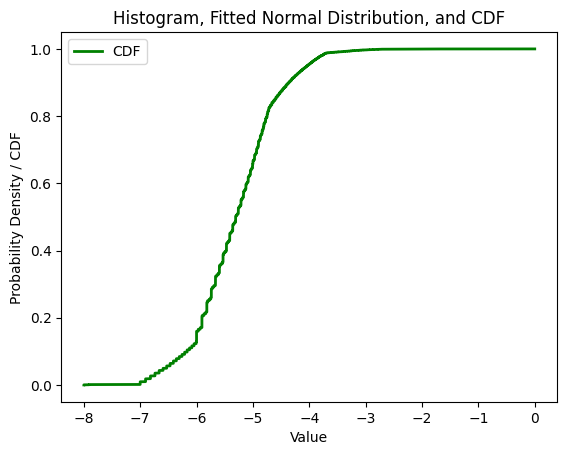

In [26]:
# Calculate and plot the CDF
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.figure()
plt.plot(sorted_data, cdf, "g-", lw=2, label="CDF")

plt.xlabel("Value")
plt.ylabel("Probability Density / CDF")
plt.title("Histogram, Fitted Normal Distribution, and CDF")
plt.legend()
plt.show()

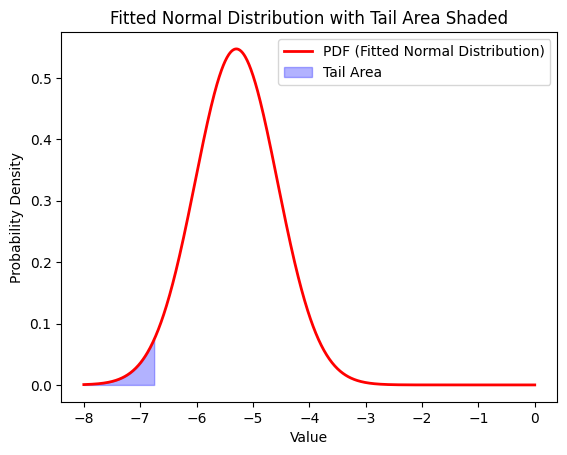

Fitted Parameters - Mean (mu): -5.294256080410237, Standard Deviation (std): 0.7288787595513604


In [31]:


# Create a figure and axis
fig, ax = plt.subplots()

# Define the range of x values for the distribution
x = np.linspace(min(data), max(data), 1000)

# Plot the probability density function (PDF) of the normal distribution
pdf = norm.pdf(x, mu, std)
ax.plot(x, pdf, "r-", lw=2, label="PDF (Fitted Normal Distribution)")

# Shade the tail area below a threshold (e.g., -2 standard deviations)
threshold = mu - 2 * std
tail_x = np.linspace(min(data), threshold, 1000)
tail_pdf = norm.pdf(tail_x, mu, std)
ax.fill_between(tail_x, tail_pdf, color="blue", alpha=0.3, label="Tail Area")

plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Fitted Normal Distribution with Tail Area Shaded")
plt.legend()
plt.show()

# Print the parameters of the fitted normal distribution
print(f"Fitted Parameters - Mean (mu): {mu}, Standard Deviation (std): {std}")